In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **HOMEWORK 2 - Modelli di Classificazione: Confronto tra Algoritmi**
In questo lavoro applicheremo diverse tecniche di machine learning per risolvere un problema di classificazione, ottimizzando le prestazioni attraverso un'attenta selezione dei modelli. Valuteremo i risultati utilizzando metriche adeguate al contesto.
Gli algoritmi che analizzeremo sono:

* **Regressione Logistica**: Classificatore lineare che modella la probabilità di appartenenza a una classe attraverso una funzione sigmoide applicata a una combinazione lineare delle variabili in input.

* **Support Vector Machine (SVM)**: Algoritmo che individua il confine decisionale ottimale massimizzando la distanza (margine) tra i punti più vicini alle classi opposte, con possibile estensione non lineare tramite kernel.

* **K-Nearest Neighbors (KNN)**: Tecnica instance-based che classifica ogni nuovo punto in base alla classe maggioritaria tra i suoi k esempi più vicini nello spazio delle feature, secondo una metrica di distanza prefissata.

* **Decision Tree**: Struttura ad albero dove ogni nodo interno rappresenta un test su una feature, ogni ramo un possibile esito e ogni foglia l'assegnazione a una classe, costruito ricorsivamente tramite suddivisioni ottimali dei dati.

In [7]:
#Importo le librerie

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import fetch_openml

# Definizione nomi classi CIFAR-10 per la matrice di confusione
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
from sklearn.datasets import fetch_openml

# Caricamento del dataset
cifar_dataset = fetch_openml('CIFAR_10', version=1, parser='auto')
    
features = cifar_dataset.data
labels = cifar_dataset.target.astype(int) 

print("\nInformazioni sul dataset caricato:")
print(f"- Esempi totali: {features.shape[0]}")
print(f"- Numero di features per esempio: {features.shape[1]}")  
print(f"- Classi disponibili: 10 (valori da {labels.min()} a {labels.max()}")


Informazioni sul dataset caricato:
- Esempi totali: 60000
- Numero di features per esempio: 3072
- Classi disponibili: 10 (valori da 0 a 9


In [3]:
# Definiamo la dimensione del sottoinsieme (10.000 osservazioni)
partizione = 10000 / features.shape[0]  # Calcola la frazione necessaria per ottenere 10.000 osservazioni

# Sottocampiona a 10.000 osservazioni totali
X_sottoinsieme, _, y_sottoinsieme, _ = train_test_split(
    features, labels, train_size=partizione, stratify=labels, random_state=42
)

# Suddivide in 80% train, 10% val, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_sottoinsieme, y_sottoinsieme, test_size=0.2, stratify=y_sottoinsieme, random_state=42
)
X_val, X_test_finale, y_val, y_test_finale = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Verifica delle dimensioni
print(f"Train set: {X_train.shape[0]} osservazioni")
print(f"Validation set: {X_val.shape[0]} osservazioni")
print(f"Test set: {X_test_finale.shape[0]} osservazioni")

Train set: 8000 osservazioni
Validation set: 1000 osservazioni
Test set: 1000 osservazioni


In [8]:
#Standardizzazione dei dati
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test_finale)

# Verifichiamo le dimensioni dopo la standardizzazione
print("\nDimensioni dopo la standardizzazione:")
print(f"Train std shape: {X_train_std.shape}")
print(f"Validation std shape: {X_val_std.shape}")
print(f"Test std shape: {X_test_std.shape}")



Dimensioni dopo la standardizzazione:
Train std shape: (8000, 3072)
Validation std shape: (1000, 3072)
Test std shape: (1000, 3072)


Regressione Logistica

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.36      0.33      0.35       100
           1       0.37      0.34      0.35       100
           2       0.13      0.12      0.12       100
           3       0.19      0.18      0.18       100
           4       0.16      0.16      0.16       100
           5       0.24      0.28      0.26       100
           6       0.28      0.26      0.27       100
           7       0.28      0.31      0.30       100
           8       0.37      0.41      0.39       100
           9       0.30      0.28      0.29       100

    accuracy                           0.27      1000
   macro avg       0.27      0.27      0.27      1000
weighted avg       0.27      0.27      0.27      1000

Accuracy: 0.2670

Test Set Performance:
              precision    recall  f1-score   support

           0       0.33      0.31      0.32       100
           1       0.38      0.36      0.

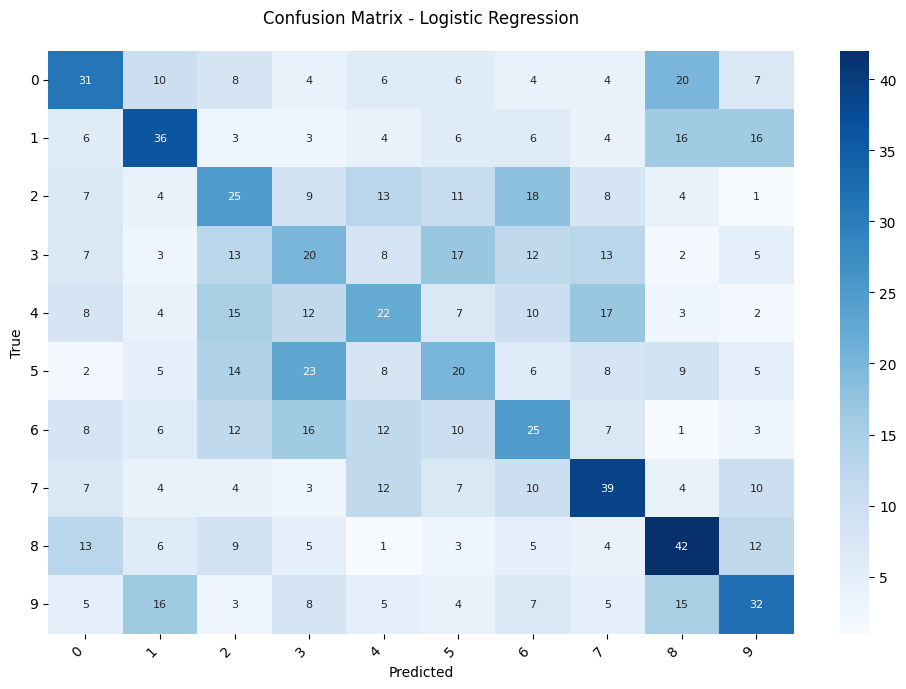

In [10]:
# Regressione Logistica
print("Regressione Logistica")

# Inizializza e addestra il modello
log_reg = LogisticRegression(max_iter=5000, random_state=42, n_jobs=-1)
log_reg.fit(X_train_std, y_train)

# Valutazione sul validation set
print("\nValidation Set Performance:")
y_val_pred = log_reg.predict(X_val_std)
print(classification_report(y_val, y_val_pred))
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

# Valutazione sul test set
print("\nTest Set Performance:")
y_test_pred = log_reg.predict(X_test_std)
print(classification_report(y_test_finale, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_finale, y_test_pred):.4f}")

# Matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_finale, y_test_pred), 
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=[str(i) for i in range(10)],  # CIFAR-10 ha classi 0-9
            yticklabels=[str(i) for i in range(10)],
            annot_kws={"size": 8})
plt.title('Confusion Matrix - Logistic Regression', pad=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

K-Nearest Neighbors Classifier
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Migliori parametri trovati:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.38      0.55      0.45       100
           1       0.54      0.14      0.22       100
           2       0.22      0.34      0.27       100
           3       0.21      0.08      0.12       100
           4       0.18      0.42      0.25       100
           5       0.39      0.29      0.33       100
           6       0.31      0.26      0.28       100
           7       0.45      0.26      0.33       100
           8       0.37      0.58      0.45       100
           9       0.64      0.16      0.26       100

    accuracy                           0.31      1000
   macro avg       0.37      0.31      0.30      1000
weighted avg       0.37      0.31      0.30      1000

Accuracy: 0.3080

Test Set

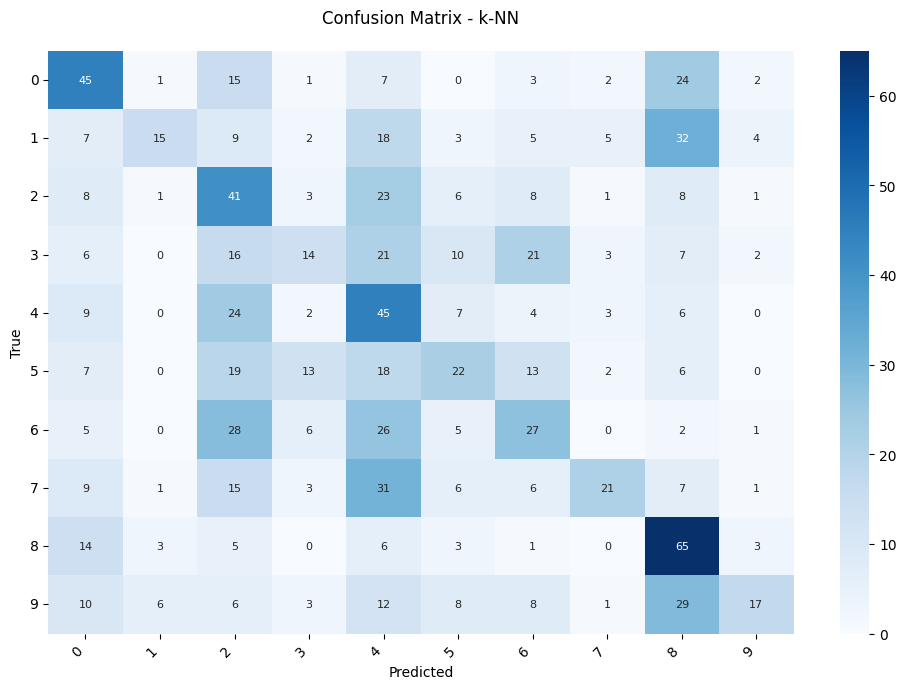

In [13]:
#K-Nearest Neighbors (K-NN)

from sklearn.model_selection import GridSearchCV

print("K-Nearest Neighbors Classifier")

# Definizione dello spazio degli iperparametri
knn_params = {
    "n_neighbors": [3, 5, 7],
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan', 'minkowski']
}

# Inizializzazione e ricerca degli iperparametri
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3, n_jobs=-1, verbose=1)
knn_grid.fit(X_train_std, y_train)

# Miglior modello trovato
best_knn = knn_grid.best_estimator_

# Risultati della ricerca
print("\nMigliori parametri trovati:")
print(knn_grid.best_params_)

# Valutazione sul validation set
print("\nValidation Set Performance:")
y_val_pred = best_knn.predict(X_val_std)
print(classification_report(y_val, y_val_pred))
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

# Valutazione sul test set
print("\nTest Set Performance:")
y_test_pred = best_knn.predict(X_test_std)
print(classification_report(y_test_finale, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_finale, y_test_pred):.4f}")

# Matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_finale, y_test_pred), 
            annot=True, fmt='d',
            cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)],
            annot_kws={"size": 8})
plt.title('Confusion Matrix - k-NN', pad=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Support Vector Machine Classifier

Inizio ricerca iperparametri...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Ricerca completata in 1647.69 secondi

Migliori parametri trovati:
{'C': 23.395864551222477, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

Addestramento finale su tutto il training set...

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       100
           1       0.57      0.61      0.59       100
           2       0.29      0.32      0.30       100
           3       0.31      0.30      0.30       100
           4       0.36      0.35      0.36       100
           5       0.34      0.37      0.35       100
           6       0.53      0.45      0.49       100
           7       0.55      0.44      0.49       100
           8       0.64      0.55      0.59       100
           9       0.55      0.61      0.58       100

    accuracy                 

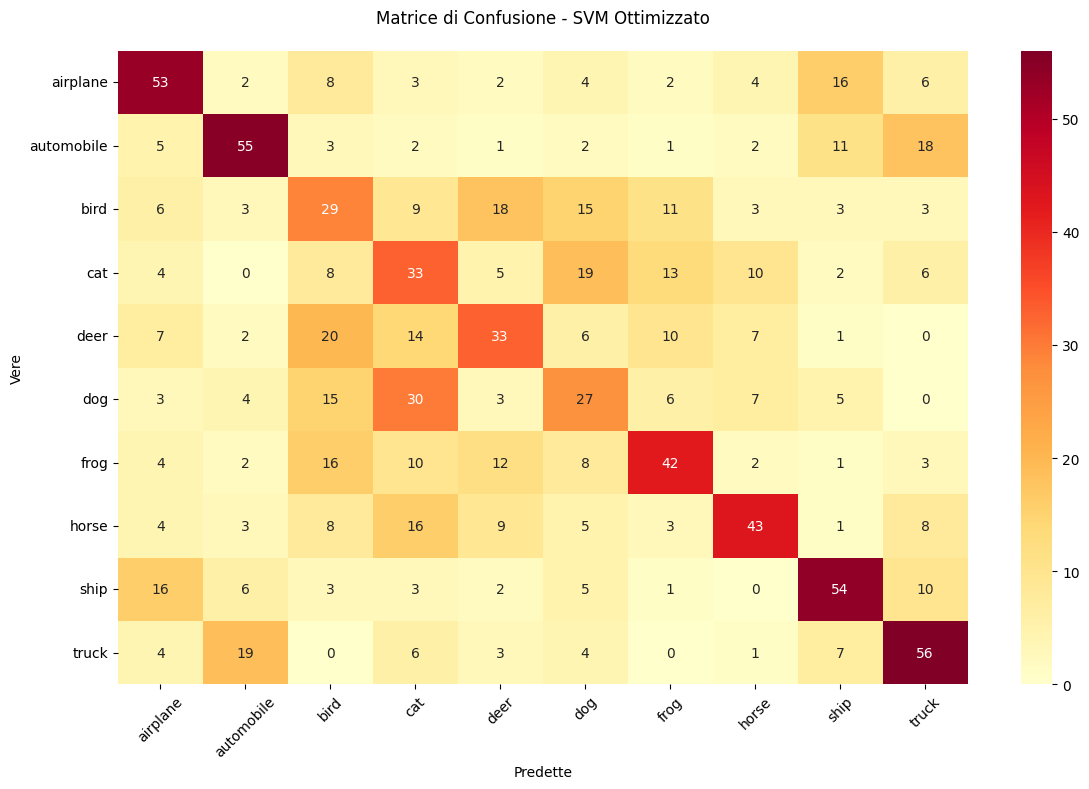

In [14]:
# Support Vector Machine (SVM) con ottimizzazione avanzata

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import time

print("Support Vector Machine Classifier\n")

# Configurazione avanzata degli iperparametri
svm_params = {
    "C": loguniform(1e-2, 1e2),  # Distribuzione logaritmica per C
    "kernel": ['linear', 'rbf', 'poly', 'sigmoid'],
    "gamma": ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),
    "degree": [2, 3, 4],  # Solo per kernel poly
    "class_weight": [None, 'balanced']
}

# Modello base con cache_size aumentata per dataset di medie dimensioni
svm = SVC(cache_size=1000, random_state=42, probability=True)

# RandomizedSearchCV con 20 iterazioni per efficienza
svm_search = RandomizedSearchCV(svm, svm_params, n_iter=20, 
                              cv=3, scoring='accuracy',
                              n_jobs=-1, verbose=1, random_state=42)

print("Inizio ricerca iperparametri...")
start_time = time.time()
svm_search.fit(X_train_std[:3000], y_train[:3000])  # Limite a 3000 esempi per efficienza
print(f"Ricerca completata in {time.time()-start_time:.2f} secondi")

# Report risultati ottimizzazione
print("\nMigliori parametri trovati:")
print(svm_search.best_params_)

# Addestramento finale con migliori parametri su tutto il training set
print("\nAddestramento finale su tutto il training set...")
best_svm = svm_search.best_estimator_
best_svm.fit(X_train_std, y_train)

# Valutazione dettagliata
def evaluate_model(model, X_val, y_val, X_test, y_test):
    print("\nValidation Set Performance:")
    y_val_pred = model.predict(X_val)
    print(classification_report(y_val, y_val_pred))
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
    
    print("\nTest Set Performance:")
    y_test_pred = model.predict(X_test)
    print(classification_report(y_test, y_test_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    
    # Plot matrice di confusione
    plt.figure(figsize=(12, 8))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Matrice di Confusione - SVM Ottimizzato', pad=20)
    plt.xlabel('Predette')
    plt.ylabel('Vere')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

evaluate_model(best_svm, X_val_std, y_val, X_test_std, y_test_finale)

Decision Tree Classifier

Fitting 3 folds for each of 54 candidates, totalling 162 fits

Migliori parametri trovati:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Training Set Performance (cross-validation):
Best CV Accuracy: 0.2391

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.36      0.49      0.41       100
           1       0.39      0.33      0.36       100
           2       0.20      0.22      0.21       100
           3       0.17      0.11      0.13       100
           4       0.22      0.29      0.25       100
           5       0.29      0.28      0.28       100
           6       0.21      0.27      0.23       100
           7       0.32      0.22      0.26       100
           8       0.40      0.37      0.39       100
           9       0.30      0.24      0.27       100

    accuracy                           0.28      1000
   macro avg       0.28      0.28      0.28    

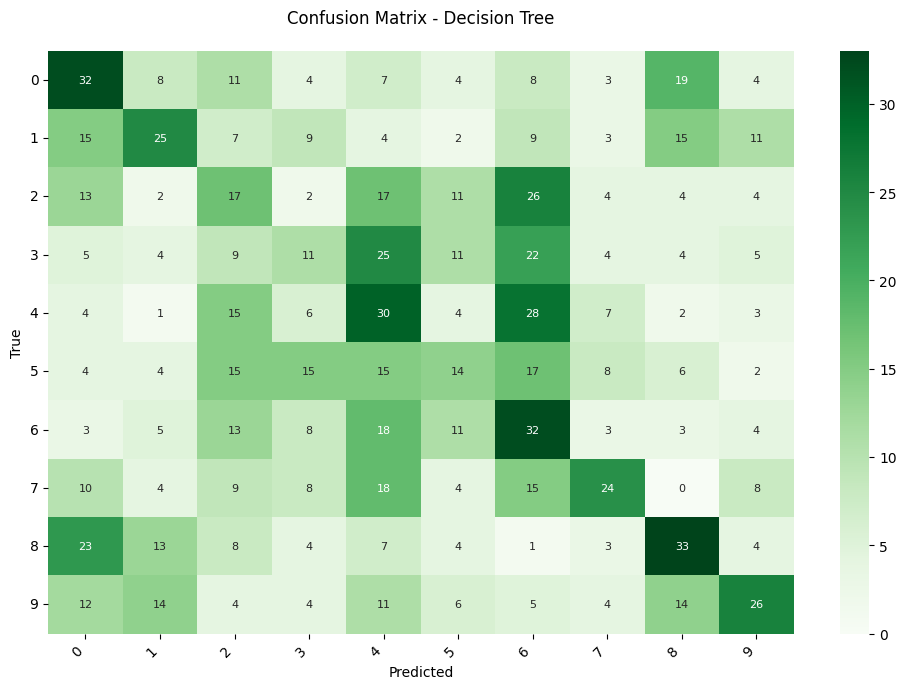

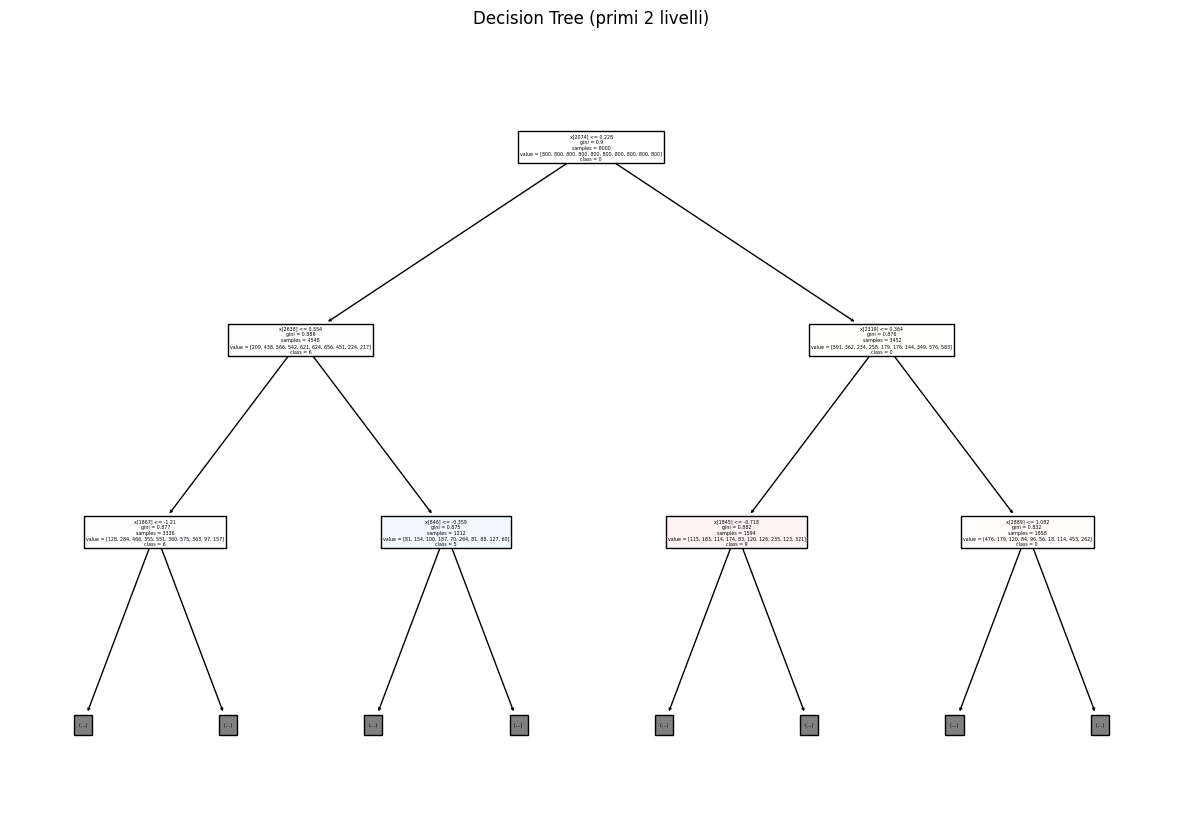

In [15]:
# Decision Tree Classifier (Albero Decisionale)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

print("Decision Tree Classifier\n")

# Definizione dei parametri da testare
tree_params = {
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ['gini', 'entropy']
}

# Inizializzazione e ricerca iperparametri
tree = DecisionTreeClassifier(random_state=42)
tree_grid = GridSearchCV(tree, tree_params, cv=3, n_jobs=-1, verbose=1)
tree_grid.fit(X_train_std, y_train)

# Miglior modello trovato
best_tree = tree_grid.best_estimator_

# Risultati della ricerca
print("\nMigliori parametri trovati:")
print(tree_grid.best_params_)

# Valutazione sui diversi set
print("\nTraining Set Performance (cross-validation):")
print(f"Best CV Accuracy: {tree_grid.best_score_:.4f}")

print("\nValidation Set Performance:")
y_val_pred = best_tree.predict(X_val_std)
print(classification_report(y_val, y_val_pred))
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

print("\nTest Set Performance:")
y_test_pred = best_tree.predict(X_test_std)
print(classification_report(y_test_finale, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_finale, y_test_pred):.4f}")

# Matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_finale, y_test_pred), 
            annot=True, fmt='d',
            cmap='Greens',  # Colore diverso per distinguerlo
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)],
            annot_kws={"size": 8})
plt.title('Confusion Matrix - Decision Tree', pad=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Opzionale: Visualizzazione dell'albero (semplice)
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(best_tree, 
          max_depth=2,  # Mostra solo i primi 2 livelli per chiarezza
          feature_names=None, 
          class_names=[str(i) for i in range(10)],
          filled=True)
plt.title("Decision Tree (primi 2 livelli)", pad=20)
plt.show()


Confronto dei modelli ottimizzati:

Logistic Regression:
  - Validation Accuracy: 0.2670
  - Test Accuracy: 0.2920
K-Nearest Neighbors:
  - Validation Accuracy: 0.3080
  - Test Accuracy: 0.3120
Support Vector Machine:
  - Validation Accuracy: 0.4660
  - Test Accuracy: 0.4250
Decision Tree:
  - Validation Accuracy: 0.2820
  - Test Accuracy: 0.2440

Il modello migliore è: Support Vector Machine, con Validation Accuracy: 0.4660


Classification Report del modello migliore sul test set:

              precision    recall  f1-score   support

           0       0.50      0.53      0.51       100
           1       0.57      0.55      0.56       100
           2       0.26      0.29      0.28       100
           3       0.26      0.33      0.29       100
           4       0.38      0.33      0.35       100
           5       0.28      0.27      0.28       100
           6       0.47      0.42      0.44       100
           7       0.54      0.43      0.48       100
           8       0.53

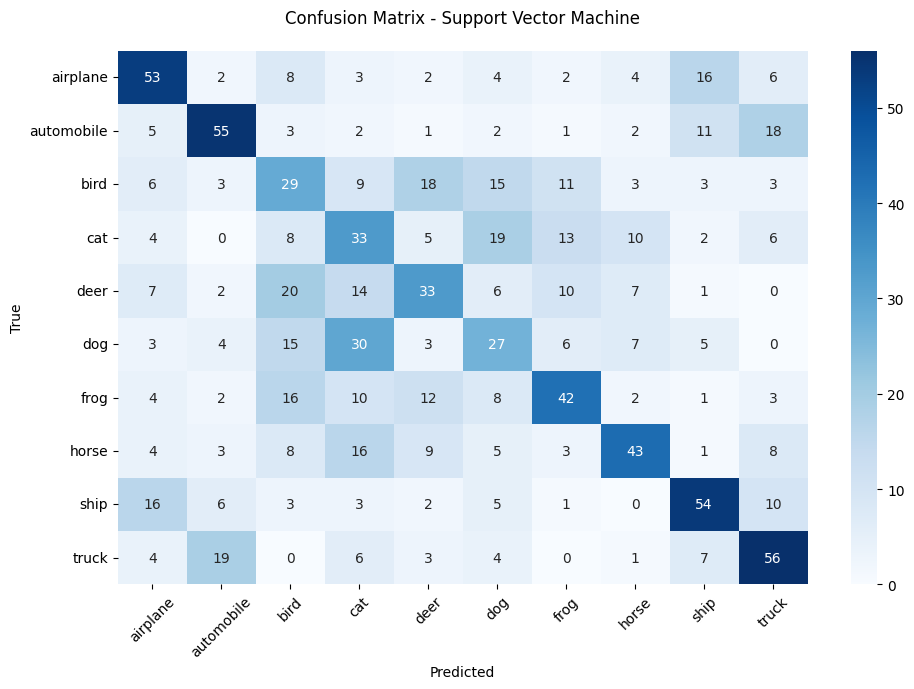


Modello migliore salvato come 'miglior_modello.pkl'


In [16]:
# Confronto Finale dei Modelli Ottimizzati

# Raccolta dei modelli già ottimizzati
modelli = {
    "Logistic Regression": log_reg,  # Già addestrato in Cell 5
    "K-Nearest Neighbors": best_knn,  # Ottimizzato in Cell 6
    "Support Vector Machine": best_svm,  # Ottimizzato in Cell 7
    "Decision Tree": best_tree  # Ottimizzato in Cell 8
}

mod_migliore = None
acc_migliore = 0
nome_mod_migliore = ""

print("\nConfronto dei modelli ottimizzati:\n")

for nome, modello in modelli.items():
    # Valutazione sul validation set
    y_val_pred = modello.predict(X_val_std)
    acc_val = accuracy_score(y_val, y_val_pred)
    
    print(f"{nome}:")
    print(f"  - Validation Accuracy: {acc_val:.4f}")
    
    # Valutazione sul test set
    y_test_pred = modello.predict(X_test_std)
    acc_test = accuracy_score(y_test_finale, y_test_pred)
    print(f"  - Test Accuracy: {acc_test:.4f}")
    
    if acc_val > acc_migliore:
        acc_migliore = acc_val
        mod_migliore = modello
        nome_mod_migliore = nome

print(f"\nIl modello migliore è: {nome_mod_migliore}, con Validation Accuracy: {acc_migliore:.4f}\n")

# Performance dettagliate del modello migliore
print("\nClassification Report del modello migliore sul test set:\n")
print(classification_report(y_test_finale, mod_migliore.predict(X_test_std)))

# Matrice di confusione del modello migliore
plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test_finale, mod_migliore.predict(X_test_std)),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title(f'Confusion Matrix - {nome_mod_migliore}', pad=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Salvataggio del modello migliore
with open('miglior_modello.pkl', 'wb') as f:
    pickle.dump(mod_migliore, f)
print("\nModello migliore salvato come 'miglior_modello.pkl'")